# plot pdf of Z, obtained with np.hist

In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from counterflow_file import *

In [2]:
# parameters
models = ['IEM','IEMHYB','EMST','EMSTHYB']
modeln = ['IEM','IEM-FI','EMST','EMST-FI']
params = {}
params['MIX'] = None
params['tres'] = 1.e-2
params['tmix'] = 0.4
params['eqv'] = 1.0
params['Zfvar'] = 0.1
params['dtmix'] = 0.01
params['phif'] = 4.76

csv_name = 'ZCTR.csv'

npts = 100
z_lb = 0
z_ub = 0.21

In [3]:
pdfs = np.empty([npts, len(models)])
for i, model in enumerate(models):
    params['MIX'] = model
    case_name = params2name(params)
    
    data = np.genfromtxt('/'.join([case_name,csv_name]),
                         delimiter=',',
                         names=True)
    
    hist, bins = np.histogram(data['Z'], 
                              bins=npts, 
                              range=(z_lb, z_ub), 
                              weights=data['R'], 
                              density=True
                             )
    pdfs[:,i] = hist

In [4]:
# figure and axes parameters
# total width is fixed, for one column plot
plot_width    = 6.7
margin_left   = 1.3
margin_right  = 0.2
margin_bottom = 1.0
margin_top    = 0.1
space_width   = 3.5
space_height  = 0.5
ftsize        = 7

font = {'family':'serif',
        'weight':'normal',
        'size':ftsize}

# use TEX for interpreter
plt.rc('text',usetex=True)
# use serif font
plt.rc('font',**font)

num_cols = 1
num_rows = 1

colors = ['tab:orange','tab:blue','tab:green','tab:red']
lines = [':','-','-.','--']

subplot_width = (plot_width
                -margin_left
                -margin_right
                -(num_cols-1)*space_width)/num_cols
subplot_height = subplot_width * 0.8

plot_height = (num_rows*subplot_height
              +margin_bottom
              +margin_top
              +(num_rows-1)*space_height)

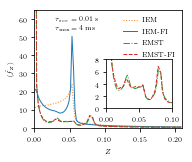

In [5]:
z = (bins[1:]+bins[:-1])/2

# plot against tmix
fig, ax = plt.subplots(num_rows,num_cols,sharex=True,
                       figsize=cm2inch(plot_width,plot_height))

for i, model in enumerate(models):
    ax.plot(z, pdfs[:,i],
            c = colors[i], ls = lines[i], lw = 1.,
            label=modeln[i])
    
# legend
ax.legend(frameon=False)

# limits
ax.set_xlim([0, 0.21])
ax.set_ylim([0, 65])

# labels
ax.set_xlabel(r'$Z$')
ax.set_ylabel(r'$\langle\tilde{f}_Z\rangle$')

# notes
ax.text(
        0.03,53,
        ''.join([
            r'$\tau_{\mathrm{res}}\,=\,$',
            '{:g}'.format(params['tres']),
            '$\;\mathrm{s}$',
            '\n',
            r'$\tau_{\mathrm{mix}}\!=\,$',
            '{:g}'.format(params['tres']*params['tmix']*1000),
            '$\;\mathrm{ms}$']))

fig.subplots_adjust(left = margin_left/plot_width,
                    bottom = margin_bottom/plot_height,
                    right = 1.0-margin_right/plot_width,
                    top = 1.0-margin_top/plot_height,
                    wspace = space_width/plot_width,
                    hspace = space_height/plot_height
                    )

axs = fig.add_axes([0.57, 0.32, 0.35, 0.33])
for i, model in enumerate(models[2:]):
    j = i + 2
    axs.plot(z, pdfs[:,j],
            c = colors[j], ls = lines[j], lw = 1.,
            label=modeln[j])

axs.set_xlim([0,0.1])
axs.set_ylim([0,8])
axs.set_yticks(np.arange(0,9,2))

In [6]:



plot_params = copy.deepcopy(params)
del plot_params['MIX']
del plot_params['tres']
del plot_params['dtmix']
del plot_params['phif']
del plot_params['Zfvar']
plot_name = params2name(plot_params)

fig.savefig('fig_pdf_z_hist_{}.pdf'.format(plot_name))
fig.savefig('fig_pdf_z_hist_{}.eps'.format(plot_name))